In [1]:
"""
Kiusalaas: Example 7.9 (page 279)
An example of a moderately stiff problem.

NB. The differential equation y' = -Ay (where A is the coefficient matrix
    is said to be stiff if there is a large disparity in the magnitudes
    of the positive eigenvalues of A.
    
For instance, in the example of second-order linear homogenous DE below,
    the two eigenvalues are \lambda_1 = 1/2 and \lambda_2 = 19/2,
    thus their ratio (the so-called stiffness ratio) is 19/2 / 1/2 = 19 >> 1.
    
Notice in the plot how dense the points are near x = 0 where there is a rapid 
    change in y', while they become more sparse as the y'-curve becomes smoother.
    This is the power of an adaptive method -- it will find an appropriate
    step size (h_next) in each iteration. (Of course, this type of method is
    not a panacea that can handle every kind of initial value problems.
    One can construct ill-behaved stiff examples, see for example Exercise 9
    on p. 288.)
"""

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from runge_kutta_e2 import *
from printSoln import *

In [2]:
def F(x, y):
    F = np.zeros(2)
    F[0] = y[1]
    F[1] = -(19/4)*y[0] - 10.0*y[1] # y'' = -19/4y - 10y'
    return F

In [3]:
x = 0.0
x_stop = 10.0
y = np.array([-9.0, 0.0]) # y(0) = -9, y'(0) = 0
h = 0.1
freq = 4
X, Y = adaptive_runge_kutta_2_3(F, x, y, x_stop, h, 1.0e-4)
printSoln(X, Y, freq)


 x   y[ 0 ]   y[ 1 ]  
   0.0000e+00   -9.0000e+00    0.0000e+00 
   4.6325e-02   -8.9605e+00    1.5824e+00 
   9.8929e-02   -8.8462e+00    2.6651e+00 
   1.6189e-01   -8.6539e+00    3.3604e+00 
   2.4026e-01   -8.3736e+00    3.7279e+00 
   3.4414e-01   -7.9792e+00    3.8187e+00 
   4.9906e-01   -7.3977e+00    3.6598e+00 
   8.3492e-01   -6.2577e+00    3.1277e+00 
   1.5252e+00   -4.4313e+00    2.2157e+00 
   2.3691e+00   -2.9058e+00    1.4529e+00 
   3.3492e+00   -1.7800e+00    8.9002e-01 
   4.5175e+00   -9.9239e-01    4.9619e-01 
   5.9637e+00   -4.8147e-01    2.4073e-01 
   7.6867e+00   -2.0332e-01    1.0155e-01 
   8.7775e+00   -1.1783e-01    5.8756e-02 
   9.8554e+00   -6.8721e-02    3.4152e-02 
   1.0000e+01   -6.3945e-02    3.1944e-02 


In [4]:
# analytical solution
def anal_F(x):
    return 0.5 * np.exp(-19/2 * x) * (1 - 19 * np.exp(9 * x))

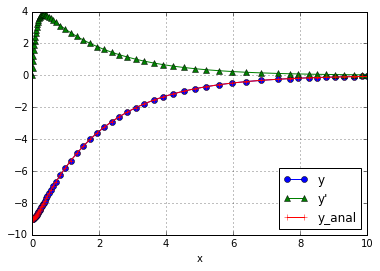

In [5]:
plt.plot(X, Y[:, 0], 'o-', X, Y[:, 1], '^-', X, anal_F(X), '+-')
plt.xlabel('x')
plt.legend(('y',"y'", 'y_anal'), loc=0)
plt.grid(True)
plt.show()